https://stepik.org/lesson/1576189/step/7

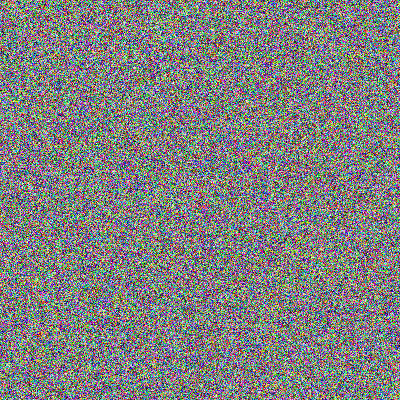

torch.Size([1, 128, 56, 56])


In [ ]:
import torch
import torchvision.transforms as tfs
import torch.nn as nn
from PIL import Image # для тестовой картинки

# здесь продолжайте программу

model = nn.Sequential(
    # Вход: (batch_size, 3, 224, 224)
    nn.Conv2d(3, 64, (3, 3), stride=1, padding=1, bias=True),   # (batch_size, 64, 224, 224)
    nn.ReLU(inplace=True),
    nn.Conv2d(64, 64, (3, 3), stride=1, padding=1, bias=True),  # (batch_size, 64, 224, 224)
    nn.ReLU(inplace=True),
    nn.MaxPool2d((2, 2), stride=2),                             # (batch_size, 64, 112, 112)
    nn.Conv2d(64, 128, (3, 3), stride=1, padding=1, bias=True), # (batch_size, 128, 112, 112)
    nn.ReLU(inplace=True),
    nn.Conv2d(128, 128, (3, 3), stride=1, padding=1, bias=True),# (batch_size, 128, 112, 112)
    nn.ReLU(inplace=True),
    nn.MaxPool2d((2, 2), stride=2),                             # (batch_size, 128, 56, 56)
)

'''
# Тестовая картинка
# Создаем тензор размером 400x400x3 (RGB) со случайными значениями от 0 до 255
data = torch.randint(0, 256, (400, 400, 3), dtype=torch.uint8)
# Преобразуем тензор в изображение PIL
img_pil = Image.fromarray(data.numpy(), 'RGB')
display(img_pil)
'''

# Resize и рреобразование в тензор
transform = tfs.Compose([
    tfs.Resize((224, 224)),
    tfs.ToTensor()
])

img = transform(img_pil).unsqueeze(0)  # Добавляем размерность батча

# Прогоняем изображение через модель
model.eval()
out = model(img)

# print(out.shape)